# Topic 2: Decision Trees & Random Forests
### We will again be using the Austin, TX weather dataset from topic 1.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from tqdm.auto import tqdm

In [91]:
# read data into a Pandas dataframe
df = pd.read_csv('../datasets/austin_weather.csv')
df.set_index('Date').sort_index()
# The "T" stands for "trace" amounts of precipitation, which we will set to 0
df['PrecipitationSumInches'] = df['PrecipitationSumInches'].replace('T', 0.0)
# Empty rows in the "Event" column will be replaced with "None"
df['Events'] = df['Events'].replace(' ', "None")
# define the columns that have numeric data that we want to analyze
data_columns = ['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'VisibilityAvgMiles', 'WindAvgMPH', 'PrecipitationSumInches']
# Convert data columns into numeric data
for dc in data_columns:
    df[dc] = pd.to_numeric(df[dc], errors='coerce')
# Remove rows in the dataset that have string entries in any of the data columns
# This can be done with less code, but using a loop makes it more clear what we are doing
rows_to_drop = []
for i in range(len(df)):
    for dc in data_columns:
        if np.isnan(df[dc][i]):
            rows_to_drop.append(i)
            break
df = df.drop(rows_to_drop)
# we want a new column that says whether or not it rained
def rained(rain_sum):
    r = np.zeros(dtype=int, shape=rain_sum.shape)
    r[rain_sum > 0] = 1
    return r
# Make a new column for the data for rain or no rain
df["Rained"] = rained(df["PrecipitationSumInches"])
# Separate out the variables and classification target
variables = ['TempAvgF', 'HumidityAvgPercent', 'SeaLevelPressureAvgInches', 'WindAvgMPH', 'VisibilityAvgMiles', 'DewPointAvgF']
target = ['Rained']

x_variables = df[variables].to_numpy()
y_targets = df[target].to_numpy().flatten()

# Perform train/test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_variables, y_targets, test_size=0.30, random_state=42)

## Decision Trees


In [92]:
# import what we need for decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [93]:
# Initialize a decision tree classifier
dt = DecisionTreeClassifier(random_state=42, max_depth=4, criterion="entropy")
# Train the decision tree classifier
dt_model = dt.fit(x_train, y_train)

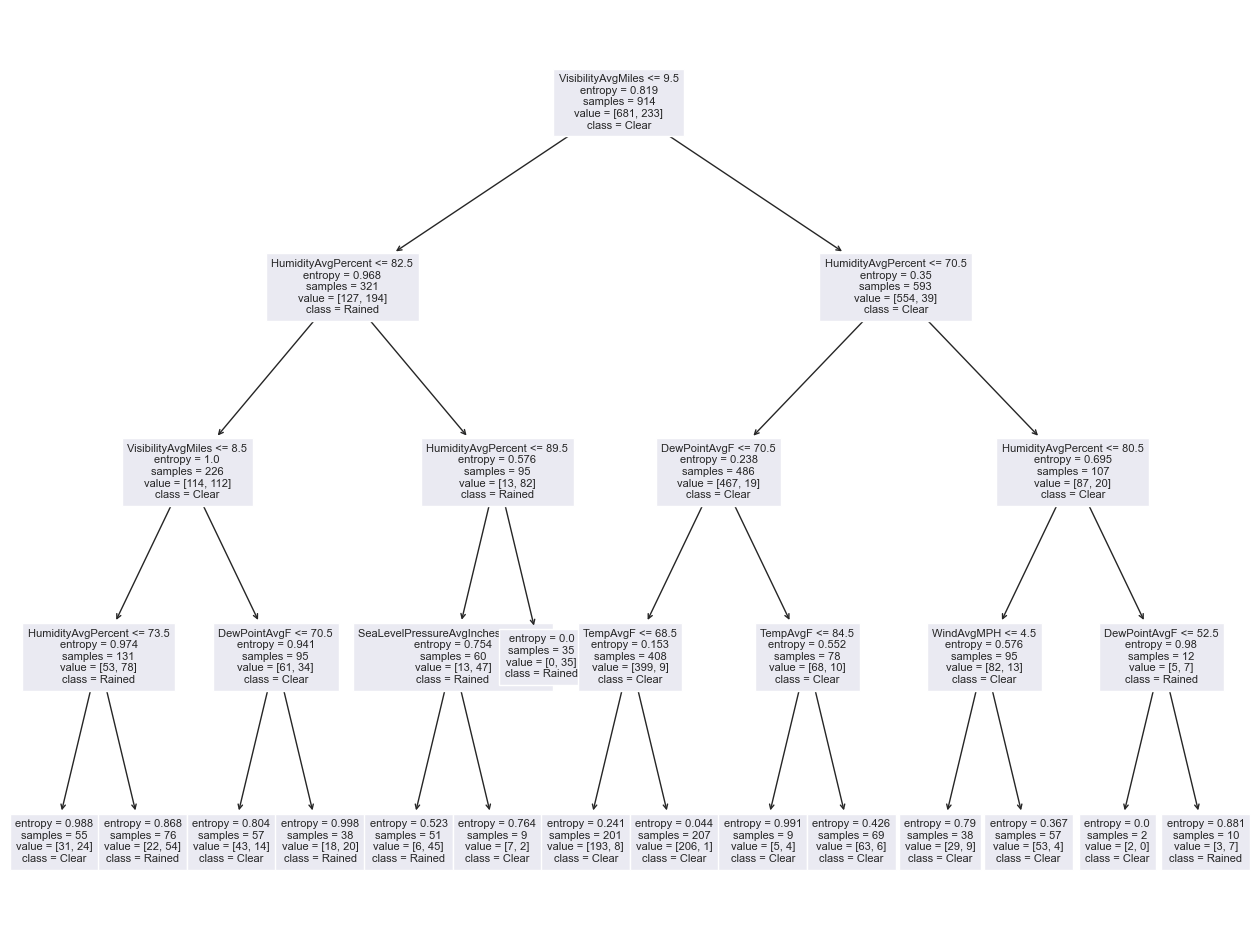

In [94]:
# plot the decision tree
fig = plt.figure(figsize=(16, 12))
tree.plot_tree(dt, feature_names=variables, class_names=["Clear", "Rained"], fontsize=8)
fig.savefig("decision_tree.png", )

In [95]:
# Perform prediction on the testing data
test_predictions = dt.predict(x_test)

[Text(0, 0.5, 'Clear'), Text(0, 1.5, 'Rained')]

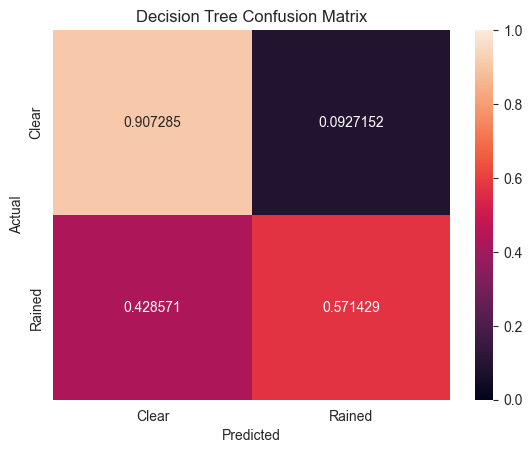

In [96]:
# Let's look at the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions, normalize='true')
ax = plt.subplot()
sns.heatmap(cm, ax=ax, annot=True, fmt='g', vmin=0.0, vmax=1.0)

plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

ax.xaxis.set_ticklabels(['Clear', 'Rained'])
ax.yaxis.set_ticklabels(['Clear', 'Rained'])

## Random Forests

In [97]:
# import what we need for the random forest
from sklearn.ensemble import RandomForestClassifier

In [98]:
# Number of tress in the random forest
num_trees = 10
# Maximum depth of each tree
max_tree_depth = 4
# Instantiate the random forest
rf = RandomForestClassifier(n_estimators=num_trees,
                            criterion='entropy',
                            max_depth=max_tree_depth,
                            bootstrap=True,
                            random_state=42)
# Train the random forest
rf_model = rf.fit(x_train, y_train)

In [99]:
# Perform prediction on the testing data
test_predictions = rf.predict(x_test)

[Text(0, 0.5, 'Clear'), Text(0, 1.5, 'Rained')]

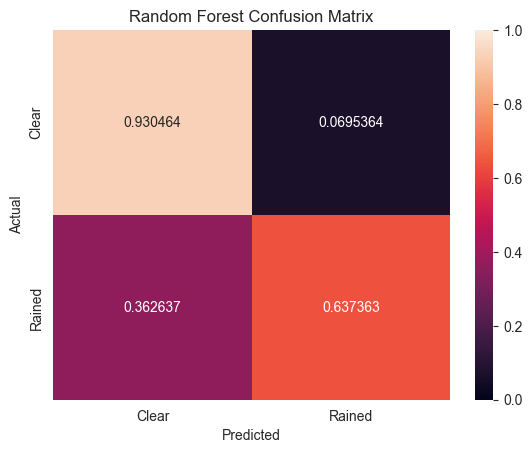

In [100]:
# Let's look at the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, test_predictions, normalize='true')
ax = plt.subplot()
sns.heatmap(cm, ax=ax, annot=True, fmt='g', vmin=0.0, vmax=1.0)

plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

ax.xaxis.set_ticklabels(['Clear', 'Rained'])
ax.yaxis.set_ticklabels(['Clear', 'Rained'])

### Note: As we see here, the random forest outperformed the decision tree by only a small amount. As a general rule of thumb, random forests will only outperform a single decision tree if said decision tree is unstable, that is, if it overfit the data. In our case, except for a minority of the leaves having a low sample count, the single decision tree was fairly stable. As such, we do not see a large performance difference between the decision tree and random forest.